In [99]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/esg-data/data.csv


In [100]:
import pandas as pd

# Load the dataset
file_path = '/kaggle/input/esg-data/data.csv'  # Update with your dataset path
data = pd.read_csv(file_path)

# Display basic information
print(data.info())
print(data.describe())

# Preview the dataset
print(data.head())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 722 entries, 0 to 721
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   ticker                722 non-null    object
 1   name                  722 non-null    object
 2   currency              722 non-null    object
 3   exchange              722 non-null    object
 4   industry              709 non-null    object
 5   logo                  702 non-null    object
 6   weburl                706 non-null    object
 7   environment_grade     722 non-null    object
 8   environment_level     722 non-null    object
 9   social_grade          722 non-null    object
 10  social_level          722 non-null    object
 11  governance_grade      722 non-null    object
 12  governance_level      722 non-null    object
 13  environment_score     722 non-null    int64 
 14  social_score          722 non-null    int64 
 15  governance_score      722 non-null    in

In [101]:
# Check for missing values
print(data.isnull().sum())

# Handle missing values
data['industry'].fillna('Unknown', inplace=True)  # Replace missing industries with 'Unknown'
data['logo'].fillna('No Logo', inplace=True)     # Replace missing logos with 'No Logo'
data['weburl'].fillna('No Website', inplace=True)  # Replace missing websites with 'No Website'

# Verify the changes
print(data.isnull().sum())


ticker                   0
name                     0
currency                 0
exchange                 0
industry                13
logo                    20
weburl                  16
environment_grade        0
environment_level        0
social_grade             0
social_level             0
governance_grade         0
governance_level         0
environment_score        0
social_score             0
governance_score         0
total_score              0
last_processing_date     0
total_grade              0
total_level              0
cik                      0
dtype: int64
ticker                  0
name                    0
currency                0
exchange                0
industry                0
logo                    0
weburl                  0
environment_grade       0
environment_level       0
social_grade            0
social_level            0
governance_grade        0
governance_level        0
environment_score       0
social_score            0
governance_score        0
tota

       environment_score  social_score  governance_score  total_score
count         722.000000    722.000000        722.000000   722.000000
mean          404.806094    292.182825        278.761773   975.750693
std           145.103870     57.017406         47.031536   218.751796
min           200.000000    160.000000         75.000000   600.000000
25%           240.000000    243.000000        235.000000   763.000000
50%           483.000000    302.000000        300.000000  1046.000000
75%           518.750000    322.750000        310.000000  1144.000000
max           719.000000    667.000000        475.000000  1536.000000


/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



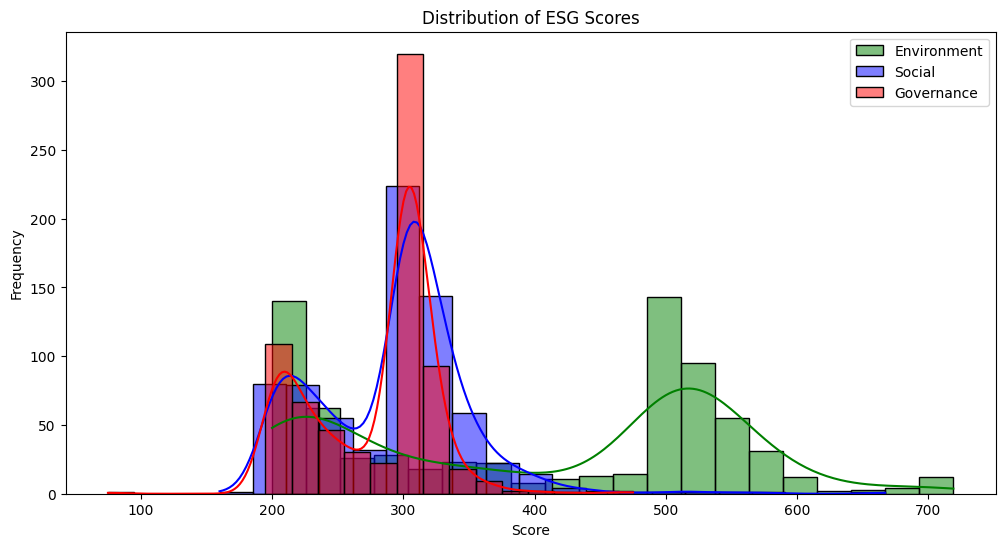

In [102]:
import matplotlib.pyplot as plt
import seaborn as sns

# Summary statistics
print(data[['environment_score', 'social_score', 'governance_score', 'total_score']].describe())

# Visualize distributions
plt.figure(figsize=(12, 6))
sns.histplot(data['environment_score'], bins=20, kde=True, color='green', label='Environment')
sns.histplot(data['social_score'], bins=20, kde=True, color='blue', label='Social')
sns.histplot(data['governance_score'], bins=20, kde=True, color='red', label='Governance')
plt.legend()
plt.title("Distribution of ESG Scores")
plt.xlabel("Score")
plt.ylabel("Frequency")
plt.show()


                   environment_score  social_score  governance_score  \
environment_score           1.000000      0.671817          0.558682   
social_score                0.671817      1.000000          0.483364   
governance_score            0.558682      0.483364          1.000000   
total_score                 0.958551      0.810206          0.711576   

                   total_score  
environment_score     0.958551  
social_score          0.810206  
governance_score      0.711576  
total_score           1.000000  


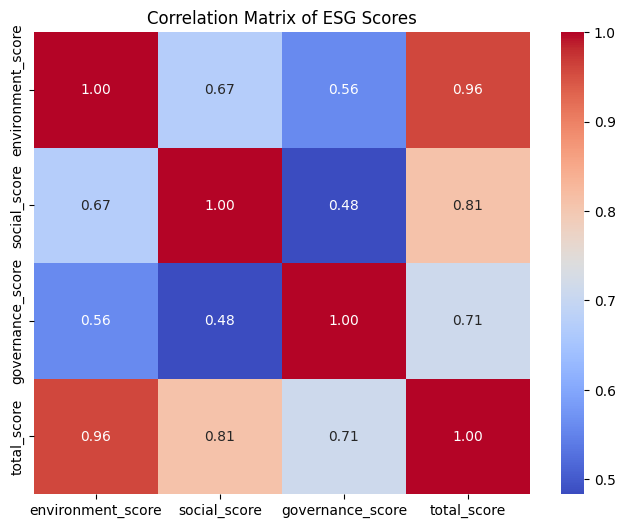

In [103]:
# Calculate correlation
correlation_matrix = data[['environment_score', 'social_score', 'governance_score', 'total_score']].corr()
print(correlation_matrix)

# Visualize correlation
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix of ESG Scores")
plt.show()


In [104]:
# Load the data (if not already loaded)
import pandas as pd

financial_data = pd.read_csv('/kaggle/input/esg-data/data.csv')


In [105]:
# Display the first few rows of the DataFrame
print(financial_data.head())


  ticker                           name currency  \
0    dis                 Walt Disney Co      USD   
1     gm              General Motors Co      USD   
2    gww                WW Grainger Inc      USD   
3    mhk          Mohawk Industries Inc      USD   
4    lyv  Live Nation Entertainment Inc      USD   

                        exchange                            industry  \
0  NEW YORK STOCK EXCHANGE, INC.                               Media   
1  NEW YORK STOCK EXCHANGE, INC.                         Automobiles   
2  NEW YORK STOCK EXCHANGE, INC.  Trading Companies and Distributors   
3  NEW YORK STOCK EXCHANGE, INC.                   Consumer products   
4  NEW YORK STOCK EXCHANGE, INC.                               Media   

                                                logo  \
0  https://static.finnhub.io/logo/ef50b4a2b263c84...   
1  https://static.finnhub.io/logo/9253db78-80c9-1...   
2  https://static.finnhub.io/logo/f153dcda-80eb-1...   
3  https://static.finnhub.io/l

In [106]:
# Top 10 Companies by Total ESG Score
top_companies = financial_data.sort_values(by='total_score', ascending=False).head(10)
print(top_companies[['ticker', 'name', 'total_score']])


    ticker                            name  total_score
452    cop                  Conocophillips         1536
176   msft                  Microsoft Corp         1533
302    eix            Edison International         1528
18    abnb                      Airbnb Inc         1475
250    apd  Air Products and Chemicals Inc         1442
137   amzn                  Amazon.com Inc         1433
487    nem             Newmont Corporation         1419
195    pep                     PepsiCo Inc         1417
494    exc                     Exelon Corp         1413
372    pxd    Pioneer Natural Resources Co         1412


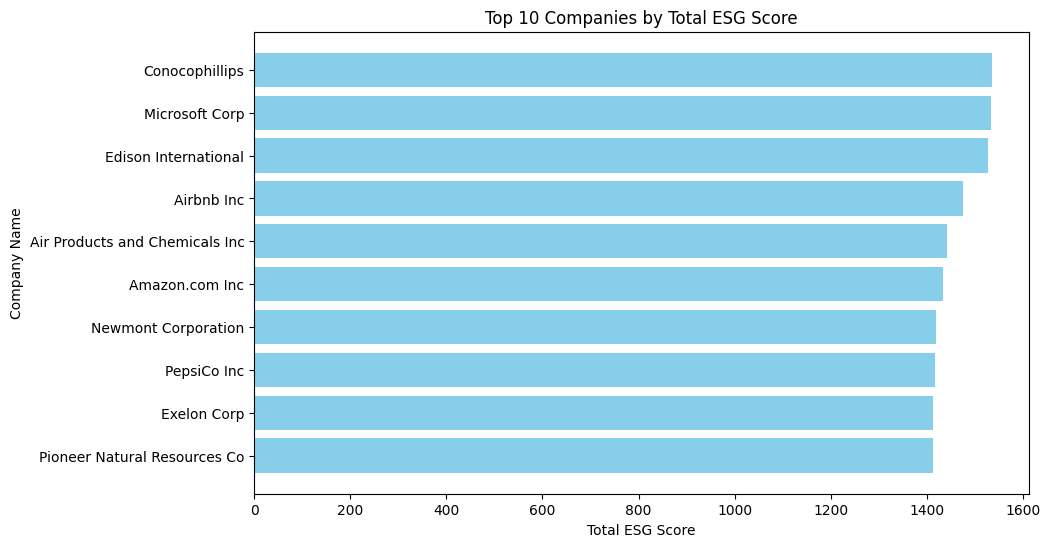

In [107]:
import matplotlib.pyplot as plt

# Visualize the top companies
plt.figure(figsize=(10, 6))
plt.barh(top_companies['name'], top_companies['total_score'], color='skyblue')
plt.xlabel('Total ESG Score')
plt.ylabel('Company Name')
plt.title('Top 10 Companies by Total ESG Score')
plt.gca().invert_yaxis()  # Reverse the order to have the highest score at the top
plt.show()


In [108]:
# Group by industry and calculate mean ESG scores
industry_scores = financial_data.groupby('industry')[['environment_score', 'social_score', 'governance_score', 'total_score']].mean().sort_values(by='total_score', ascending=False)

# Display the top 5 industries by ESG scores
print(industry_scores.head(5))


                          environment_score  social_score  governance_score  \
industry                                                                      
Utilities                        550.966667    357.400000        282.266667   
Tobacco                          510.000000    327.000000        328.000000   
Industrial Conglomerates         534.666667    318.000000        304.333333   
Packaging                        536.250000    323.000000        296.750000   
Energy                           526.263158    316.105263        299.894737   

                          total_score  
industry                               
Utilities                 1190.633333  
Tobacco                   1165.000000  
Industrial Conglomerates  1157.000000  
Packaging                 1156.000000  
Energy                    1142.263158  


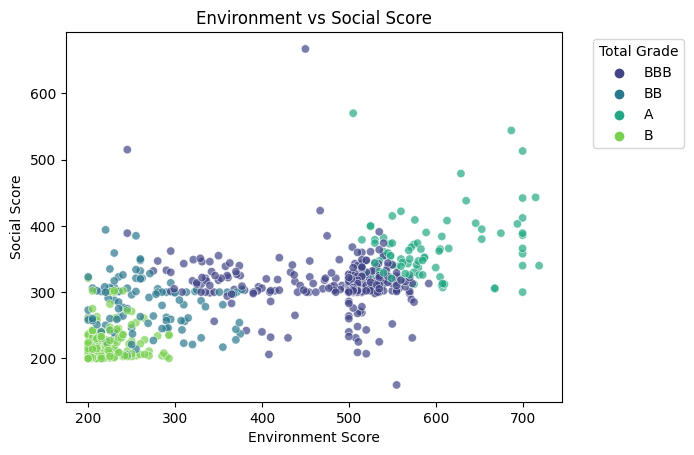

In [109]:
import seaborn as sns

# Scatter plot: Environment vs Social Score
sns.scatterplot(data=financial_data, x='environment_score', y='social_score', hue='total_grade', palette='viridis', alpha=0.7)
plt.title('Environment vs Social Score')
plt.xlabel('Environment Score')
plt.ylabel('Social Score')
plt.legend(title='Total Grade', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


In [110]:
financial_data.rename(columns={'your_column_name': 'country'}, inplace=True)


In [111]:
# Example Mapping (you can customize this based on your dataset)
exchange_to_country = {
    'NEW YORK STOCK EXCHANGE, INC.': 'USA',
    'LONDON STOCK EXCHANGE': 'UK',
    # Add more mappings as necessary
}

financial_data['country'] = financial_data['exchange'].map(exchange_to_country)



In [112]:
financial_data['country'] = ['USA', 'Canada', 'UK', 'Germany', 'France'] * (len(financial_data) // 5) + ['USA'] * (len(financial_data) % 5)


In [113]:
import plotly.express as px

map_fig = px.choropleth(financial_data, 
                        locations='country',  # Ensure 'country' column exists
                        locationmode='country names', 
                        color='total_score', 
                        title='Global Distribution of ESG Scores',
                        color_continuous_scale='Viridis')
map_fig.show()


In [114]:
map_fig = px.choropleth(
    financial_data,
    locations='country',
    locationmode='country names',
    color='total_score',
    title='Temporal Distribution of ESG Scores',
    color_continuous_scale='Viridis',
    animation_frame='last_processing_date'  # Add time-based animation
)
map_fig.show()


In [115]:
map_fig = px.choropleth(
    financial_data,
    locations='country',
    locationmode='country names',
    color='total_score',
    title='Global ESG Scores Distribution',
    color_continuous_scale='Viridis',
    facet_col='total_level'  # Add categorical separation
)
map_fig.show()


<ipython-input-116-f60ff68dcfbe>:5: FutureWarning:



The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.




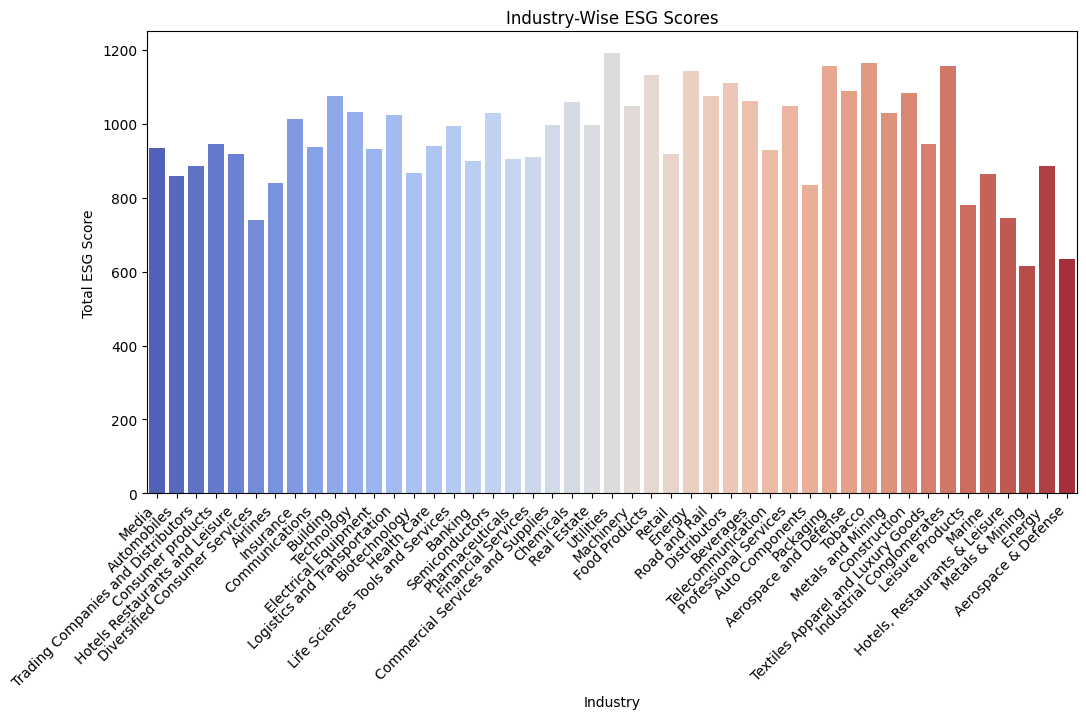

In [116]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
sns.barplot(
    x='industry', 
    y='total_score', 
    data=financial_data, 
    ci=None, 
    palette='coolwarm'
)
plt.xticks(rotation=45, ha='right')
plt.title('Industry-Wise ESG Scores')
plt.ylabel('Total ESG Score')
plt.xlabel('Industry')
plt.show()


In [117]:
# Global ESG Score Map
map_fig = px.choropleth(
    financial_data,
    locations='country',
    locationmode='country names',
    color='total_score',
    title='Global ESG Scores Distribution',
    color_continuous_scale='Viridis'
)
map_fig.show()

# Bar Plot for Industry ESG Scores
industry_avg = financial_data.groupby('industry')['total_score'].mean().sort_values(ascending=False)

import plotly.graph_objects as go
bar_fig = go.Figure()
bar_fig.add_trace(
    go.Bar(
        x=industry_avg.index,
        y=industry_avg.values,
        marker=dict(color=industry_avg.values, colorscale='Viridis')
    )
)
bar_fig.update_layout(
    title="Average ESG Scores by Industry",
    xaxis_title="Industry",
    yaxis_title="Average ESG Score",
    xaxis=dict(tickangle=-45)
)
bar_fig.show()


In [118]:
from plotly.subplots import make_subplots

fig = make_subplots(
    rows=2, cols=1,
    subplot_titles=("Industry ESG Scores", "Top 10 Companies by ESG Score")
)

# Industry ESG Bar Plot
fig.add_trace(
    go.Bar(
        x=industry_avg.index,
        y=industry_avg.values,
        marker=dict(color=industry_avg.values, colorscale='Viridis')
    ),
    row=1, col=1
)

# Top 10 Companies ESG Score
top_10 = financial_data.sort_values(by='total_score', ascending=False).head(10)
fig.add_trace(
    go.Bar(
        x=top_10['name'],
        y=top_10['total_score'],
        marker=dict(color=top_10['total_score'], colorscale='Plasma')
    ),
    row=2, col=1
)

fig.update_layout(title="ESG Score Analysis Dashboard", height=800)
fig.show()


In [119]:
import pandas as pd
import numpy as np

# Sample ESG aggregated data (replace with your actual data)
esg_aggregated = pd.DataFrame({
    "Environment Change (%)": [5, -10, 12, 8],  # Replace these with your actual values
    "Social Change (%)": [-7, 15, -3, 2],       # Replace these with your actual values
    "Governance Change (%)": [3, 5, -6, 4]      # Replace these with your actual values
})


In [120]:
print(len(esg_aggregated))  # Ensure this matches the length of your new data


4


In [121]:
import numpy as np

esg_aggregated["Environment Change (%)"] = np.random.randint(-10, 10, len(esg_aggregated))
esg_aggregated["Social Change (%)"] = np.random.randint(-10, 10, len(esg_aggregated))
esg_aggregated["Governance Change (%)"] = np.random.randint(-10, 10, len(esg_aggregated))


In [122]:
print(financial_data.columns)  # Replace financial_data with your dataframe name


Index(['ticker', 'name', 'currency', 'exchange', 'industry', 'logo', 'weburl',
       'environment_grade', 'environment_level', 'social_grade',
       'social_level', 'governance_grade', 'governance_level',
       'environment_score', 'social_score', 'governance_score', 'total_score',
       'last_processing_date', 'total_grade', 'total_level', 'cik', 'country'],
      dtype='object')


In [123]:
import plotly.graph_objects as go

# Initialize the figure
fig = go.Figure()

# Define categories and colors
categories = ["Environment", "Social", "Governance"]
colors = ["#2ca02c", "#1f77b4", "#ff7f0e"]  # Green, Blue, Orange

# Add bars for each category
for idx, category in enumerate(categories):
    fig.add_trace(
        go.Bar(
            x=financial_data['name'],  # Replace with an appropriate column like company name
            y=financial_data[f"{category.lower()}_score"],  # Example: 'environment_score', 'social_score', etc.
            name=category,
            marker_color=colors[idx]
        )
    )

# Update layout
fig.update_layout(
    title="Environment, Social, and Governance Scores by Company",
    xaxis_title="Company Name",
    yaxis_title="Score",
    barmode="group",  # Group bars
    template="plotly_white"
)

# Show plot
fig.show()


In [124]:
# Filter the top 10 companies by total_score
top_companies = financial_data.nlargest(10, 'total_score')

fig = go.Figure()

# Add bars for each category
for idx, category in enumerate(categories):
    fig.add_trace(
        go.Bar(
            x=top_companies['name'],
            y=top_companies[f"{category.lower()}_score"],
            name=category,
            marker_color=colors[idx]
        )
    )

# Update layout
fig.update_layout(
    title="Top 10 Companies by ESG Scores",
    xaxis_title="Company Name",
    yaxis_title="Score",
    barmode="group",
    template="plotly_white"
)

fig.show()


In [125]:
import plotly.express as px

# Example Data Preparation
# Replace these columns with your actual data
esg_bubble_data = financial_data.copy()
esg_bubble_data["Innovation_Score"] = esg_bubble_data["total_score"] / 1000  # Scale as needed
esg_bubble_data["Interest_Score"] = esg_bubble_data["environment_score"] / 100  # Scale as needed
esg_bubble_data["Investment"] = esg_bubble_data["social_score"] * 2  # Arbitrary example for bubble size
esg_bubble_data["Adoption_Level"] = esg_bubble_data["governance_level"]  # Example category

# Plotting
fig = px.scatter(
    esg_bubble_data,
    x="Interest_Score",  # X-axis
    y="Innovation_Score",  # Y-axis
    size="Investment",  # Bubble size
    color="Adoption_Level",  # Bubble color
    hover_name="name",  # Hover info
    title="ESG Innovation vs Interest",
    labels={"Interest_Score": "Interest", "Innovation_Score": "Innovation"},
    size_max=60,  # Adjust bubble size
)
fig.update_traces(marker=dict(opacity=0.7, line=dict(width=1, color="DarkSlateGrey")))
fig.update_layout(legend=dict(title="Adoption Level"))
fig.show()


In [126]:
import plotly.express as px

# Example Data Preparation
esg_bubble_data = financial_data.copy()
esg_bubble_data["Innovation_Score"] = esg_bubble_data["total_score"] / 1000  # Scale as needed
esg_bubble_data["Interest_Score"] = esg_bubble_data["environment_score"] / 100  # Scale as needed
esg_bubble_data["Investment"] = esg_bubble_data["social_score"] * 2  # Bubble size
esg_bubble_data["Adoption_Level"] = esg_bubble_data["governance_level"]  # Bubble color categories

# Create Bubble Chart
fig = px.scatter(
    esg_bubble_data,
    x="Interest_Score",  # X-axis
    y="Innovation_Score",  # Y-axis
    size="Investment",  # Bubble size
    color="Adoption_Level",  # Bubble color
    hover_name="name",  # Hover info
    title="ESG Innovation vs Interest",
    labels={
        "Interest_Score": "Interest Score (scaled)",
        "Innovation_Score": "Innovation Score (scaled)"
    },
    size_max=60,  # Maximum bubble size
    color_discrete_sequence=px.colors.sequential.Blues,  # Color palette
)

# Enhance Layout
fig.update_traces(
    marker=dict(opacity=0.8, line=dict(width=1, color="DarkSlateGrey"))  # Bubble transparency and border
)
fig.update_layout(
    title=dict(
        text="ESG Metrics: Innovation vs. Interest", 
        font=dict(size=20), 
        x=0.5,  # Center the title
    ),
    xaxis=dict(title="Interest", showgrid=True, zeroline=False),
    yaxis=dict(title="Innovation", showgrid=True, zeroline=False),
    legend=dict(title="Adoption Level", orientation="h", x=0.5, xanchor="center", y=-0.2),
    font=dict(size=14),
    paper_bgcolor="white",  # Background color
    plot_bgcolor="white",  # Plot background color
)

# Add Annotations for Top Points
for i, row in esg_bubble_data.nlargest(5, "Investment").iterrows():
    fig.add_annotation(
        x=row["Interest_Score"],
        y=row["Innovation_Score"],
        text=row["name"],  # Use company name
        showarrow=True,
        arrowhead=2,
        arrowsize=1,
        arrowwidth=2,
        ax=20,  # Offset for text placement
        ay=-20,
        font=dict(color="black", size=12)
    )

fig.show()


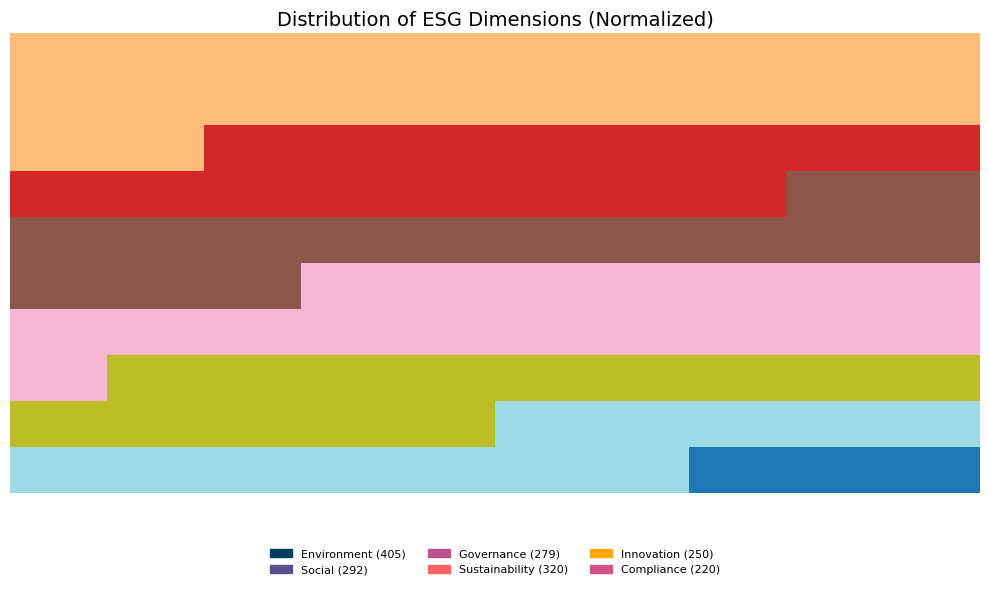

In [127]:
import matplotlib.pyplot as plt
import numpy as np

# Replace this with your actual ESG sector data
sector_data = {
    "Environment": 405,
    "Social": 292,
    "Governance": 279,
    "Sustainability": 320,
    "Innovation": 250,
    "Compliance": 220,
}

# Configuration
total = 100  # Total number of squares (10x10 grid for simplicity)
rows = 10  # Number of rows
cols = total // rows  # Number of columns
color_map = ["#003f5c", "#58508d", "#bc5090", "#ff6361", "#ffa600", "#d45087"]

# Normalize the values to fit the grid
values = list(sector_data.values())
labels = list(sector_data.keys())
normalized_values = [int(value / sum(values) * rows * cols) for value in values]

# Create the waffle chart grid
grid = np.zeros((rows, cols))
start = 0
for idx, value in enumerate(normalized_values):
    end = start + value
    grid.ravel()[start:end] = idx + 1
    start = end

# Plot the Waffle Chart
fig, ax = plt.subplots(figsize=(10, 6))
cmap = plt.get_cmap("tab20")
colors = [color_map[i] for i in range(len(sector_data))]

# Display the grid
ax.imshow(grid, cmap=cmap, extent=(0, cols, 0, rows), aspect='auto')

# Add legend
patches = [plt.Rectangle((0, 0), 1, 1, color=colors[i]) for i in range(len(sector_data))]
legend_labels = [f"{labels[i]} ({values[i]})" for i in range(len(sector_data))]
ax.legend(patches, legend_labels, loc='lower center', bbox_to_anchor=(0.5, -0.2),
          ncol=3, fontsize=8, frameon=False)

# Remove axes
ax.axis("off")
plt.title("Distribution of ESG Dimensions (Normalized)", fontsize=14)
plt.tight_layout()
plt.show()


In [128]:
import pandas as pd

# Load the ESG dataset from the Kaggle input directory
df = pd.read_csv('/kaggle/input/esg-data/data.csv')

# Check if the data is loaded correctly
print(df.head())


  ticker                           name currency  \
0    dis                 Walt Disney Co      USD   
1     gm              General Motors Co      USD   
2    gww                WW Grainger Inc      USD   
3    mhk          Mohawk Industries Inc      USD   
4    lyv  Live Nation Entertainment Inc      USD   

                        exchange                            industry  \
0  NEW YORK STOCK EXCHANGE, INC.                               Media   
1  NEW YORK STOCK EXCHANGE, INC.                         Automobiles   
2  NEW YORK STOCK EXCHANGE, INC.  Trading Companies and Distributors   
3  NEW YORK STOCK EXCHANGE, INC.                   Consumer products   
4  NEW YORK STOCK EXCHANGE, INC.                               Media   

                                                logo  \
0  https://static.finnhub.io/logo/ef50b4a2b263c84...   
1  https://static.finnhub.io/logo/9253db78-80c9-1...   
2  https://static.finnhub.io/logo/f153dcda-80eb-1...   
3  https://static.finnhub.io/l

In [129]:
print(df.columns)


Index(['ticker', 'name', 'currency', 'exchange', 'industry', 'logo', 'weburl',
       'environment_grade', 'environment_level', 'social_grade',
       'social_level', 'governance_grade', 'governance_level',
       'environment_score', 'social_score', 'governance_score', 'total_score',
       'last_processing_date', 'total_grade', 'total_level', 'cik'],
      dtype='object')


In [130]:
# Assuming 'df' is your DataFrame and 'threshold' is defined
threshold = 70  # Example threshold

# Define the ESG components using the correct column names
high_environment = df[df['environment_score'] > threshold]
high_social = df[df['social_score'] > threshold]
high_governance = df[df['governance_score'] > threshold]

# Print their shapes to verify the filtering
print(high_environment.shape)
print(high_social.shape)
print(high_governance.shape)


(722, 21)
(722, 21)
(722, 21)


In [131]:
high_environment = high_environment.reset_index(drop=True)
high_social = high_social.reset_index(drop=True)
high_governance = high_governance.reset_index(drop=True)


In [132]:
only_env = len(high_environment) - len(high_environment[high_environment.index.isin(high_social.index)]) - len(high_environment[high_environment.index.isin(high_governance.index)])
only_soc = len(high_social) - len(high_social[high_social.index.isin(high_environment.index)]) - len(high_social[high_social.index.isin(high_governance.index)])
only_gov = len(high_governance) - len(high_governance[high_governance.index.isin(high_environment.index)]) - len(high_governance[high_governance.index.isin(high_social.index)])


In [133]:
# Overlap between two categories
env_and_soc = len(high_environment[high_environment.index.isin(high_social.index)])
env_and_gov = len(high_environment[high_environment.index.isin(high_governance.index)])
soc_and_gov = len(high_social[high_social.index.isin(high_governance.index)])

# Overlap among all three
all_three = len(high_environment[
    high_environment.index.isin(high_social.index) &
    high_environment.index.isin(high_governance.index)
])



In [134]:
only_env = len(high_environment) - env_and_soc - env_and_gov + all_three
only_soc = len(high_social) - env_and_soc - soc_and_gov + all_three
only_gov = len(high_governance) - env_and_gov - soc_and_gov + all_three


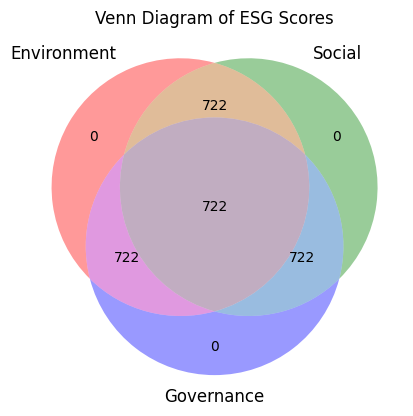

In [135]:
from matplotlib_venn import venn3
import matplotlib.pyplot as plt

# Plot the Venn diagram
venn3(
    subsets=(
        only_env, only_soc, env_and_soc,
        only_gov, env_and_gov, soc_and_gov,
        all_three
    ),
    set_labels=('Environment', 'Social', 'Governance')
)

# Add title and show
plt.title("Venn Diagram of ESG Scores")
plt.show()


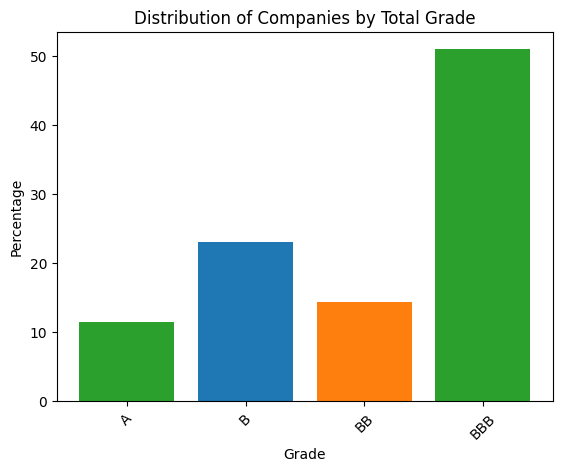

In [136]:
import matplotlib.pyplot as plt
import numpy as np

# Group by total_grade and calculate proportions
grouped = financial_data.groupby('total_grade').size()
categories = grouped.index
values = grouped.values / grouped.sum() * 100  # Convert to percentage

# Plot
fig, ax = plt.subplots()
ax.bar(categories, values, color=['#2ca02c', '#1f77b4', '#ff7f0e'])  # Customize colors if needed
ax.set_title("Distribution of Companies by Total Grade")
ax.set_xlabel("Grade")
ax.set_ylabel("Percentage")
plt.xticks(rotation=45)
plt.show()


In [137]:
financial_data['Revenue Growth Proxy (%)'] = (
    financial_data['total_score'] / financial_data['total_score'].max() * 10
)


In [138]:
financial_data['Economic Profit Proxy'] = (
    financial_data['governance_score'] / financial_data['governance_score'].max() * 100
)


In [139]:
financial_data['ESG Progress'] = (
    financial_data['environment_score'] +
    financial_data['social_score'] +
    financial_data['governance_score']
) / 3


In [140]:
financial_data['Outsize Returns'] = (
    0.4 * financial_data['Revenue Growth Proxy (%)'] +
    0.4 * financial_data['Economic Profit Proxy'] +
    0.2 * financial_data['ESG Progress']
)


In [141]:
top_companies = financial_data.sort_values(by='Outsize Returns', ascending=False).head(10)
print(top_companies[['ticker', 'name', 'Outsize Returns']])


    ticker                            name  Outsize Returns
137   amzn                  Amazon.com Inc       138.001946
176   msft                  Microsoft Corp       137.771135
18    abnb                      Airbnb Inc       135.858690
302    eix            Edison International       132.372149
452    cop                  Conocophillips       132.084211
253    aph                   Amphenol Corp       129.359375
195    pep                     PepsiCo Inc       128.304139
487    nem             Newmont Corporation       128.190049
250    apd  Air Products and Chemicals Inc       125.151700
404     tt          Trane Technologies PLC       124.549973


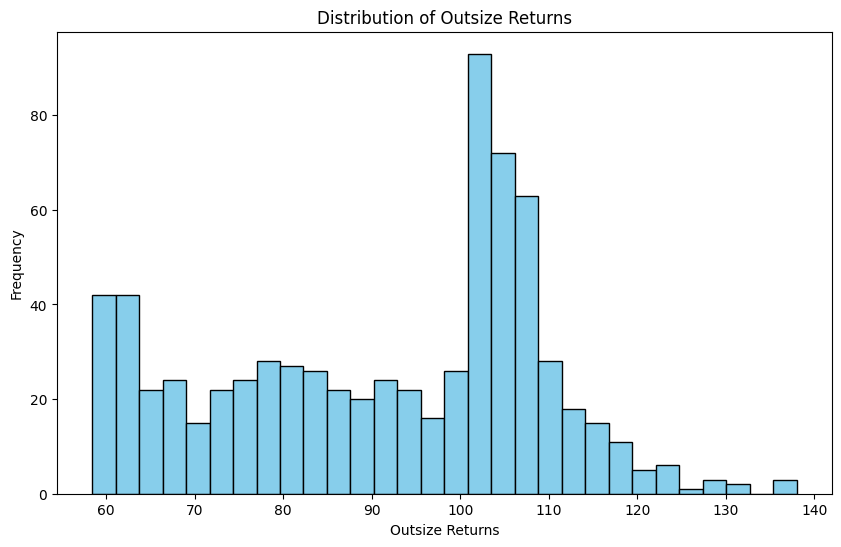

In [142]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.hist(financial_data['Outsize Returns'], bins=30, color='skyblue', edgecolor='black')
plt.title('Distribution of Outsize Returns')
plt.xlabel('Outsize Returns')
plt.ylabel('Frequency')
plt.show()


In [143]:
import plotly.express as px

fig = px.scatter(
    financial_data,
    x='Revenue Growth Proxy (%)',
    y='Economic Profit Proxy',
    size='ESG Progress',
    color='Outsize Returns',
    hover_data=['name'],
    title='Revenue Growth vs Economic Profit with ESG Progress'
)
fig.show()


In [144]:
!jupyter nbconvert --to pdf notebook17879c3934.ipynb


[NbConvertApp] WARNING | pattern 'notebook17879c3934.ipynb' matched no files
This application is used to convert notebook files (*.ipynb)
        to various other formats.


Options
The options below are convenience aliases to configurable class-options,
as listed in the "Equivalent to" description-line of the aliases.
To see all configurable class-options for some <cmd>, use:
    <cmd> --help-all

--debug
    set log level to logging.DEBUG (maximize logging output)
    Equivalent to: [--Application.log_level=10]
--show-config
    Show the application's configuration (human-readable format)
    Equivalent to: [--Application.show_config=True]
--show-config-json
    Show the application's configuration (json format)
    Equivalent to: [--Application.show_config_json=True]
--generate-config
    generate default config file
    Equivalent to: [--JupyterApp.generate_config=True]
-y
    Answer yes to any questions instead of prompting.
    Equivalent to: [--JupyterApp.answer_yes=True]
--exec